In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
multi_act = pd.read_csv("ATUS DATA 03-19/atus_activity_0319.dat", 
                        dtype= {"TRCODEP": object, "TRTIER1P": object, "TRTIER2P": object}) #using 2003-2019 activity file
#multi_act

In [3]:
multi_resp = pd.read_csv("ATUS DATA 03-19/atus_resp_0319.dat")
#multi_resp

In [4]:
multi_merged = pd.merge(multi_act, multi_resp, on="TUCASEID")
multi_merged = multi_merged.filter(["TUCASEID","TUACTDUR24","TUCUMDUR","TRTIER1P","TRTIER2P","TRCODEP", 
                                    "TEWHERE","TELFS", "TUFNWGTP","TUSTARTTIM","TUSTOPTIME", "TUYEAR"])
#multi_merged

In [5]:
#TELFS = employment status 
multi_merged["TELFS"].unique()

array([2, 1, 4, 5, 3])

## Unemployed Population

In [6]:
unemployed_codes = [3,4] # 3= Unemployed - on layoff, 3 = Unemployed - looking
multi_merged_unemployed = multi_merged[multi_merged["TELFS"].isin(unemployed_codes)]
multi_merged_unemployed["TELFS"].unique()

array([4, 3])

In [7]:
unemp_2003 = multi_merged_unemployed[multi_merged_unemployed["TUCASEID"].apply(str).str.startswith("2003")]
atus_2003_unemp_weight = unemp_2003.drop_duplicates(subset=["TUCASEID"])
atus_2003_unemp_weight = atus_2003_unemp_weight["TUFNWGTP"].sum()
atus_2003_unemp_weight

4392886319.613959

## 2003-2019 Residential - Unemployed

In [8]:
#only residential location from 2003-2019
residential_location = [-1,1,3]
atus_multi_yr_res_unemp = multi_merged_unemployed[multi_merged_unemployed["TEWHERE"].isin(residential_location)]
#atus_multi_yr_res_unemp

In [9]:
#atus residential year seperation by unemployed population 
atus_2003_res_unemp = atus_multi_yr_res_unemp[atus_multi_yr_res_unemp["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_res_unemp = atus_multi_yr_res_unemp[atus_multi_yr_res_unemp["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_res_unemp = atus_multi_yr_res_unemp[atus_multi_yr_res_unemp["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_res_unemp = atus_multi_yr_res_unemp[atus_multi_yr_res_unemp["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_res_unemp = atus_multi_yr_res_unemp[atus_multi_yr_res_unemp["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_res_unemp = atus_multi_yr_res_unemp[atus_multi_yr_res_unemp["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_res_unemp = atus_multi_yr_res_unemp[atus_multi_yr_res_unemp["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_res_unemp = atus_multi_yr_res_unemp[atus_multi_yr_res_unemp["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_res_unemp = atus_multi_yr_res_unemp[atus_multi_yr_res_unemp["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_res_unemp = atus_multi_yr_res_unemp[atus_multi_yr_res_unemp["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_res_unemp = atus_multi_yr_res_unemp[atus_multi_yr_res_unemp["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_res_unemp = atus_multi_yr_res_unemp[atus_multi_yr_res_unemp["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_res_unemp = atus_multi_yr_res_unemp[atus_multi_yr_res_unemp["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_res_unemp = atus_multi_yr_res_unemp[atus_multi_yr_res_unemp["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_res_unemp = atus_multi_yr_res_unemp[atus_multi_yr_res_unemp["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_res_unemp = atus_multi_yr_res_unemp[atus_multi_yr_res_unemp["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_res_unemp = atus_multi_yr_res_unemp[atus_multi_yr_res_unemp["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_res_unemp

### 2003 All Residential Activities - Unemployed Population

In [10]:
atus_2003_all_res_unemp = atus_2003_res_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_all_res_unemp

In [11]:
atus_2003_all_res_unemp_merge = pd.merge(atus_2003_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_all_res_unemp_merge

In [12]:
atus_2003_all_res_unemp_merge["Multiplied Weight"] = atus_2003_all_res_unemp_merge["TUACTDUR24"] * atus_2003_all_res_unemp_merge["TUFNWGTP"]
#atus_2003_all_res_unemp_merge

In [13]:
atus_2003_all_res_unemp_multiplied_weight = atus_2003_all_res_unemp_merge["Multiplied Weight"].sum()
atus_2003_all_res_unemp_multiplied_weight

5182588217166.77

In [14]:
unemp_2003 = multi_merged_unemployed[multi_merged_unemployed["TUCASEID"].apply(str).str.startswith("2003")]
atus_2003_unemp_weight = unemp_2003.drop_duplicates(subset=["TUCASEID"])
atus_2003_unemp_weight = atus_2003_unemp_weight["TUFNWGTP"].sum()
atus_2003_unemp_weight

4392886319.613959

In [15]:
all_act_2003_res_unemp_hpd = atus_2003_all_res_unemp_multiplied_weight / atus_2003_unemp_weight / 60
all_act_2003_res_unemp_hpd

19.662805727625443

### 2004 All Residential Activities - Unemployed Population

In [16]:
atus_2004_all_res_unemp = atus_2004_res_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_all_res_unemp

In [17]:
atus_2004_all_res_unemp_merge = pd.merge(atus_2004_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2004_all_res_unemp_merge["Multiplied Weight"] = atus_2004_all_res_unemp_merge["TUACTDUR24"] * atus_2004_all_res_unemp_merge["TUFNWGTP"]
#atus_2004_all_res_unemp_merge

In [18]:
unemp_2004 = multi_merged_unemployed[multi_merged_unemployed["TUCASEID"].apply(str).str.startswith("2004")]
atus_2004_unemp_weight = unemp_2004.drop_duplicates(subset=["TUCASEID"])
atus_2004_unemp_weight = atus_2004_unemp_weight["TUFNWGTP"].sum()

atus_2004_all_res_unemp_multiplied_weight = atus_2004_all_res_unemp_merge["Multiplied Weight"].sum()

In [19]:
all_act_2004_res_unemp_hpd = atus_2004_all_res_unemp_multiplied_weight / atus_2004_unemp_weight / 60
all_act_2004_res_unemp_hpd

19.577109088593215

### 2005 All Residential Activities - Unemployed Population

In [20]:
atus_2005_all_res_unemp = atus_2005_res_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_all_res_unemp

In [21]:
atus_2005_all_res_unemp_merge = pd.merge(atus_2005_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2005_all_res_unemp_merge["Multiplied Weight"] = atus_2005_all_res_unemp_merge["TUACTDUR24"] * atus_2005_all_res_unemp_merge["TUFNWGTP"]
#atus_2005_all_res_unemp_merge

In [22]:
unemp_2005 = multi_merged_unemployed[multi_merged_unemployed["TUCASEID"].apply(str).str.startswith("2005")]
atus_2005_unemp_weight = unemp_2005.drop_duplicates(subset=["TUCASEID"])
atus_2005_unemp_weight = atus_2005_unemp_weight["TUFNWGTP"].sum()

atus_2005_all_res_unemp_multiplied_weight = atus_2005_all_res_unemp_merge["Multiplied Weight"].sum()

In [23]:
all_act_2005_res_unemp_hpd = atus_2005_all_res_unemp_multiplied_weight / atus_2005_unemp_weight / 60
all_act_2005_res_unemp_hpd

19.897607446565623

### 2006 All Residential Activities - Unemployed Population

In [24]:
atus_2006_all_res_unemp = atus_2006_res_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_all_res_unemp

In [25]:
atus_2006_all_res_unemp_merge = pd.merge(atus_2006_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2006_all_res_unemp_merge["Multiplied Weight"] = atus_2006_all_res_unemp_merge["TUACTDUR24"] * atus_2006_all_res_unemp_merge["TUFNWGTP"]
#atus_2006_all_res_unemp_merge

In [26]:
unemp_2006 = multi_merged_unemployed[multi_merged_unemployed["TUCASEID"].apply(str).str.startswith("2006")]
atus_2006_unemp_weight = unemp_2006.drop_duplicates(subset=["TUCASEID"])
atus_2006_unemp_weight = atus_2006_unemp_weight["TUFNWGTP"].sum()

atus_2006_all_res_unemp_multiplied_weight = atus_2006_all_res_unemp_merge["Multiplied Weight"].sum()

In [27]:
all_act_2006_res_unemp_hpd = atus_2006_all_res_unemp_multiplied_weight / atus_2006_unemp_weight / 60
all_act_2006_res_unemp_hpd

19.834923059014486

### 2007 All Residential Activities - Unemployed Population

In [28]:
atus_2007_all_res_unemp = atus_2007_res_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_all_res_unemp

In [29]:
atus_2007_all_res_unemp_merge = pd.merge(atus_2007_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2007_all_res_unemp_merge["Multiplied Weight"] = atus_2007_all_res_unemp_merge["TUACTDUR24"] * atus_2007_all_res_unemp_merge["TUFNWGTP"]
#atus_2007_all_res_unemp_merge

In [30]:
unemp_2007 = multi_merged_unemployed[multi_merged_unemployed["TUCASEID"].apply(str).str.startswith("2007")]
atus_2007_unemp_weight = unemp_2007.drop_duplicates(subset=["TUCASEID"])
atus_2007_unemp_weight = atus_2007_unemp_weight["TUFNWGTP"].sum()

atus_2007_all_res_unemp_multiplied_weight = atus_2007_all_res_unemp_merge["Multiplied Weight"].sum()

In [31]:
all_act_2007_res_unemp_hpd = atus_2007_all_res_unemp_multiplied_weight / atus_2007_unemp_weight / 60
all_act_2007_res_unemp_hpd

20.005739986573982

### 2008 All Residential Activities - Unemployed Population

In [32]:
atus_2008_all_res_unemp = atus_2008_res_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_all_res_unemp

In [33]:
atus_2008_all_res_unemp_merge = pd.merge(atus_2008_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2008_all_res_unemp_merge["Multiplied Weight"] = atus_2008_all_res_unemp_merge["TUACTDUR24"] * atus_2008_all_res_unemp_merge["TUFNWGTP"]
#atus_2008_all_res_unemp_merge

In [34]:
unemp_2008 = multi_merged_unemployed[multi_merged_unemployed["TUCASEID"].apply(str).str.startswith("2008")]
atus_2008_unemp_weight = unemp_2008.drop_duplicates(subset=["TUCASEID"])
atus_2008_unemp_weight = atus_2008_unemp_weight["TUFNWGTP"].sum()

atus_2008_all_res_unemp_multiplied_weight = atus_2008_all_res_unemp_merge["Multiplied Weight"].sum()

In [35]:
all_act_2008_res_unemp_hpd = atus_2008_all_res_unemp_multiplied_weight / atus_2008_unemp_weight / 60
all_act_2008_res_unemp_hpd

19.937483559118274

### 2009 All Residential Activities - Unemployed Population

In [36]:
atus_2009_all_res_unemp = atus_2009_res_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_all_res_unemp

In [37]:
atus_2009_all_res_unemp_merge = pd.merge(atus_2009_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2009_all_res_unemp_merge["Multiplied Weight"] = atus_2009_all_res_unemp_merge["TUACTDUR24"] * atus_2009_all_res_unemp_merge["TUFNWGTP"]
#atus_2009_all_res_unemp_merge

In [38]:
unemp_2009 = multi_merged_unemployed[multi_merged_unemployed["TUCASEID"].apply(str).str.startswith("2009")]
atus_2009_unemp_weight = unemp_2009.drop_duplicates(subset=["TUCASEID"])
atus_2009_unemp_weight = atus_2009_unemp_weight["TUFNWGTP"].sum()

atus_2009_all_res_unemp_multiplied_weight = atus_2009_all_res_unemp_merge["Multiplied Weight"].sum()

In [39]:
all_act_2009_res_unemp_hpd = atus_2009_all_res_unemp_multiplied_weight / atus_2009_unemp_weight / 60
all_act_2009_res_unemp_hpd

19.9508015597221

### 2010 All Residential Activities - Unemployed Population

In [40]:
atus_2010_all_res_unemp = atus_2010_res_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_all_res_unemp

In [41]:
atus_2010_all_res_unemp_merge = pd.merge(atus_2010_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2010_all_res_unemp_merge["Multiplied Weight"] = atus_2010_all_res_unemp_merge["TUACTDUR24"] * atus_2010_all_res_unemp_merge["TUFNWGTP"]
#atus_2010_all_res_unemp_merge

In [42]:
unemp_2010 = multi_merged_unemployed[multi_merged_unemployed["TUCASEID"].apply(str).str.startswith("2010")]
atus_2010_unemp_weight = unemp_2010.drop_duplicates(subset=["TUCASEID"])
atus_2010_unemp_weight = atus_2010_unemp_weight["TUFNWGTP"].sum()

atus_2010_all_res_unemp_multiplied_weight = atus_2010_all_res_unemp_merge["Multiplied Weight"].sum()

In [43]:
all_act_2010_res_unemp_hpd = atus_2010_all_res_unemp_multiplied_weight / atus_2010_unemp_weight / 60
all_act_2010_res_unemp_hpd

20.006918469316233

### 2011 All Residential Activities - Unemployed Population

In [44]:
atus_2011_all_res_unemp = atus_2011_res_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_all_res_unemp

In [45]:
atus_2011_all_res_unemp_merge = pd.merge(atus_2011_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2011_all_res_unemp_merge["Multiplied Weight"] = atus_2011_all_res_unemp_merge["TUACTDUR24"] * atus_2011_all_res_unemp_merge["TUFNWGTP"]
#atus_2011_all_res_unemp_merge

In [46]:
atus_2011_all_res_unemp_merge = pd.merge(atus_2011_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2011_all_res_unemp_merge["Multiplied Weight"] = atus_2011_all_res_unemp_merge["TUACTDUR24"] * atus_2011_all_res_unemp_merge["TUFNWGTP"]
#atus_2011_all_res_unemp_merge

In [47]:
unemp_2011 = multi_merged_unemployed[multi_merged_unemployed["TUCASEID"].apply(str).str.startswith("2011")]
atus_2011_unemp_weight = unemp_2011.drop_duplicates(subset=["TUCASEID"])
atus_2011_unemp_weight = atus_2011_unemp_weight["TUFNWGTP"].sum()

atus_2011_all_res_unemp_multiplied_weight = atus_2011_all_res_unemp_merge["Multiplied Weight"].sum()

In [48]:
all_act_2011_res_unemp_hpd = atus_2011_all_res_unemp_multiplied_weight / atus_2011_unemp_weight / 60
all_act_2011_res_unemp_hpd

19.903429722504303

### 2012 All Residential Activities - Unemployed Population

In [49]:
atus_2012_all_res_unemp = atus_2012_res_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_all_res_unemp

In [50]:
atus_2012_all_res_unemp_merge = pd.merge(atus_2012_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2012_all_res_unemp_merge["Multiplied Weight"] = atus_2012_all_res_unemp_merge["TUACTDUR24"] * atus_2012_all_res_unemp_merge["TUFNWGTP"]
#atus_2012_all_res_unemp_merge

In [51]:
atus_2012_all_res_unemp_merge = pd.merge(atus_2012_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2012_all_res_unemp_merge["Multiplied Weight"] = atus_2012_all_res_unemp_merge["TUACTDUR24"] * atus_2012_all_res_unemp_merge["TUFNWGTP"]
#atus_2012_all_res_unemp_merge

In [52]:
unemp_2012 = multi_merged_unemployed[multi_merged_unemployed["TUCASEID"].apply(str).str.startswith("2012")]
atus_2012_unemp_weight = unemp_2012.drop_duplicates(subset=["TUCASEID"])
atus_2012_unemp_weight = atus_2012_unemp_weight["TUFNWGTP"].sum()

atus_2012_all_res_unemp_multiplied_weight = atus_2012_all_res_unemp_merge["Multiplied Weight"].sum()

In [53]:
all_act_2012_res_unemp_hpd = atus_2012_all_res_unemp_multiplied_weight / atus_2012_unemp_weight / 60
all_act_2012_res_unemp_hpd

19.79363715901313

### 2013 All Residential Activities - Unemployed Population

In [54]:
atus_2013_all_res_unemp = atus_2013_res_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_all_res_unemp

In [55]:
atus_2013_all_res_unemp_merge = pd.merge(atus_2013_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2013_all_res_unemp_merge["Multiplied Weight"] = atus_2013_all_res_unemp_merge["TUACTDUR24"] * atus_2013_all_res_unemp_merge["TUFNWGTP"]
#atus_2013_all_res_unemp_merge

In [56]:
atus_2013_all_res_unemp_merge = pd.merge(atus_2013_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2013_all_res_unemp_merge["Multiplied Weight"] = atus_2013_all_res_unemp_merge["TUACTDUR24"] * atus_2013_all_res_unemp_merge["TUFNWGTP"]
#atus_2013_all_res_unemp_merge

In [57]:
unemp_2013 = multi_merged_unemployed[multi_merged_unemployed["TUCASEID"].apply(str).str.startswith("2013")]
atus_2013_unemp_weight = unemp_2013.drop_duplicates(subset=["TUCASEID"])
atus_2013_unemp_weight = atus_2013_unemp_weight["TUFNWGTP"].sum()

atus_2013_all_res_unemp_multiplied_weight = atus_2013_all_res_unemp_merge["Multiplied Weight"].sum()

In [58]:
all_act_2013_res_unemp_hpd = atus_2013_all_res_unemp_multiplied_weight / atus_2013_unemp_weight / 60
all_act_2013_res_unemp_hpd

19.7551595126508

### 2014 All Residential Activities - Unemployed Population

In [59]:
atus_2014_all_res_unemp = atus_2014_res_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_all_res_unemp

In [60]:
atus_2014_all_res_unemp_merge = pd.merge(atus_2014_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2014_all_res_unemp_merge["Multiplied Weight"] = atus_2014_all_res_unemp_merge["TUACTDUR24"] * atus_2014_all_res_unemp_merge["TUFNWGTP"]
#atus_2014_all_res_unemp_merge

In [61]:
atus_2014_all_res_unemp_merge = pd.merge(atus_2014_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2014_all_res_unemp_merge["Multiplied Weight"] = atus_2014_all_res_unemp_merge["TUACTDUR24"] * atus_2014_all_res_unemp_merge["TUFNWGTP"]
#atus_2014_all_res_unemp_merge

In [62]:
unemp_2014 = multi_merged_unemployed[multi_merged_unemployed["TUCASEID"].apply(str).str.startswith("2014")]
atus_2014_unemp_weight = unemp_2014.drop_duplicates(subset=["TUCASEID"])
atus_2014_unemp_weight = atus_2014_unemp_weight["TUFNWGTP"].sum()

atus_2014_all_res_unemp_multiplied_weight = atus_2014_all_res_unemp_merge["Multiplied Weight"].sum()

In [63]:
all_act_2014_res_unemp_hpd = atus_2014_all_res_unemp_multiplied_weight / atus_2014_unemp_weight / 60
all_act_2014_res_unemp_hpd

20.169591742501517

### 2015 All Residential Activities - Unemployed Population

In [64]:
atus_2015_all_res_unemp = atus_2015_res_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_all_res_unemp

In [65]:
atus_2015_all_res_unemp_merge = pd.merge(atus_2015_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2015_all_res_unemp_merge["Multiplied Weight"] = atus_2015_all_res_unemp_merge["TUACTDUR24"] * atus_2015_all_res_unemp_merge["TUFNWGTP"]
#atus_2015_all_res_unemp_merge

In [66]:
atus_2015_all_res_unemp_merge = pd.merge(atus_2015_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2015_all_res_unemp_merge["Multiplied Weight"] = atus_2015_all_res_unemp_merge["TUACTDUR24"] * atus_2015_all_res_unemp_merge["TUFNWGTP"]
#atus_2015_all_res_unemp_merge

In [67]:
unemp_2015 = multi_merged_unemployed[multi_merged_unemployed["TUCASEID"].apply(str).str.startswith("2015")]
atus_2015_unemp_weight = unemp_2015.drop_duplicates(subset=["TUCASEID"])
atus_2015_unemp_weight = atus_2015_unemp_weight["TUFNWGTP"].sum()

atus_2015_all_res_unemp_multiplied_weight = atus_2015_all_res_unemp_merge["Multiplied Weight"].sum()

In [68]:
all_act_2015_res_unemp_hpd = atus_2015_all_res_unemp_multiplied_weight / atus_2015_unemp_weight / 60
all_act_2015_res_unemp_hpd

20.132570865253495

### 2016 All Residential Activities - Unemployed Population

In [69]:
atus_2016_all_res_unemp = atus_2016_res_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_all_res_unemp

In [70]:
atus_2016_all_res_unemp_merge = pd.merge(atus_2016_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2016_all_res_unemp_merge["Multiplied Weight"] = atus_2016_all_res_unemp_merge["TUACTDUR24"] * atus_2016_all_res_unemp_merge["TUFNWGTP"]
#atus_2016_all_res_unemp_merge

In [71]:
atus_2016_all_res_unemp_merge = pd.merge(atus_2016_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2016_all_res_unemp_merge["Multiplied Weight"] = atus_2016_all_res_unemp_merge["TUACTDUR24"] * atus_2016_all_res_unemp_merge["TUFNWGTP"]
#atus_2016_all_res_unemp_merge

In [72]:
unemp_2016 = multi_merged_unemployed[multi_merged_unemployed["TUCASEID"].apply(str).str.startswith("2016")]
atus_2016_unemp_weight = unemp_2016.drop_duplicates(subset=["TUCASEID"])
atus_2016_unemp_weight = atus_2016_unemp_weight["TUFNWGTP"].sum()

atus_2016_all_res_unemp_multiplied_weight = atus_2016_all_res_unemp_merge["Multiplied Weight"].sum()

In [73]:
all_act_2016_res_unemp_hpd = atus_2016_all_res_unemp_multiplied_weight / atus_2016_unemp_weight / 60
all_act_2016_res_unemp_hpd

19.837443399942643

### 2017 All Residential Activities - Unemployed Population

In [74]:
atus_2017_all_res_unemp = atus_2017_res_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_all_res_unemp

In [75]:
atus_2017_all_res_unemp_merge = pd.merge(atus_2017_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2017_all_res_unemp_merge["Multiplied Weight"] = atus_2017_all_res_unemp_merge["TUACTDUR24"] * atus_2017_all_res_unemp_merge["TUFNWGTP"]
#atus_2017_all_res_unemp_merge

In [76]:
atus_2017_all_res_unemp_merge = pd.merge(atus_2017_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2017_all_res_unemp_merge["Multiplied Weight"] = atus_2017_all_res_unemp_merge["TUACTDUR24"] * atus_2017_all_res_unemp_merge["TUFNWGTP"]
#atus_2017_all_res_unemp_merge

In [77]:
unemp_2017 = multi_merged_unemployed[multi_merged_unemployed["TUCASEID"].apply(str).str.startswith("2017")]
atus_2017_unemp_weight = unemp_2017.drop_duplicates(subset=["TUCASEID"])
atus_2017_unemp_weight = atus_2017_unemp_weight["TUFNWGTP"].sum()

atus_2017_all_res_unemp_multiplied_weight = atus_2017_all_res_unemp_merge["Multiplied Weight"].sum()

In [78]:
all_act_2017_res_unemp_hpd = atus_2017_all_res_unemp_multiplied_weight / atus_2017_unemp_weight / 60
all_act_2017_res_unemp_hpd

19.81927271327297

### 2018 All Residential Activities - Unemployed Population

In [79]:
atus_2018_all_res_unemp = atus_2018_res_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_all_res_unemp

In [80]:
atus_2018_all_res_unemp_merge = pd.merge(atus_2018_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2018_all_res_unemp_merge["Multiplied Weight"] = atus_2018_all_res_unemp_merge["TUACTDUR24"] * atus_2018_all_res_unemp_merge["TUFNWGTP"]
#atus_2018_all_res_unemp_merge

In [81]:
atus_2018_all_res_unemp_merge = pd.merge(atus_2018_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2018_all_res_unemp_merge["Multiplied Weight"] = atus_2018_all_res_unemp_merge["TUACTDUR24"] * atus_2018_all_res_unemp_merge["TUFNWGTP"]
#atus_2018_all_res_unemp_merge

In [82]:
unemp_2018 = multi_merged_unemployed[multi_merged_unemployed["TUCASEID"].apply(str).str.startswith("2018")]
atus_2018_unemp_weight = unemp_2018.drop_duplicates(subset=["TUCASEID"])
atus_2018_unemp_weight = atus_2018_unemp_weight["TUFNWGTP"].sum()

atus_2018_all_res_unemp_multiplied_weight = atus_2018_all_res_unemp_merge["Multiplied Weight"].sum()

In [83]:
all_act_2018_res_unemp_hpd = atus_2018_all_res_unemp_multiplied_weight / atus_2018_unemp_weight / 60
all_act_2018_res_unemp_hpd

20.674421058689273

### 2019 All Residential Activities - Unemployed Population

In [84]:
atus_2019_all_res_unemp = atus_2019_res_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_all_res_unemp

In [85]:
atus_2019_all_res_unemp_merge = pd.merge(atus_2019_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2019_all_res_unemp_merge["Multiplied Weight"] = atus_2019_all_res_unemp_merge["TUACTDUR24"] * atus_2019_all_res_unemp_merge["TUFNWGTP"]
#atus_2019_all_res_unemp_merge

In [86]:
atus_2019_all_res_unemp_merge = pd.merge(atus_2019_all_res_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2019_all_res_unemp_merge["Multiplied Weight"] = atus_2019_all_res_unemp_merge["TUACTDUR24"] * atus_2019_all_res_unemp_merge["TUFNWGTP"]
#atus_2019_all_res_unemp_merge

In [87]:
unemp_2019 = multi_merged_unemployed[multi_merged_unemployed["TUCASEID"].apply(str).str.startswith("2019")]
atus_2019_unemp_weight = unemp_2019.drop_duplicates(subset=["TUCASEID"])
atus_2019_unemp_weight = atus_2019_unemp_weight["TUFNWGTP"].sum()

atus_2019_all_res_unemp_multiplied_weight = atus_2019_all_res_unemp_merge["Multiplied Weight"].sum()

In [88]:
all_act_2019_res_unemp_hpd = atus_2019_all_res_unemp_multiplied_weight / atus_2019_unemp_weight / 60
all_act_2019_res_unemp_hpd

20.697726781418282

### Regresssion: All Residential Activity - Unemployed 

#### 2003 -2012 Regression 

In [89]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_res_unemp_hpd, all_act_2004_res_unemp_hpd, all_act_2005_res_unemp_hpd,
                                   all_act_2006_res_unemp_hpd, all_act_2007_res_unemp_hpd, all_act_2008_res_unemp_hpd,
                                   all_act_2009_res_unemp_hpd, all_act_2010_res_unemp_hpd, all_act_2011_res_unemp_hpd,
                                   all_act_2012_res_unemp_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

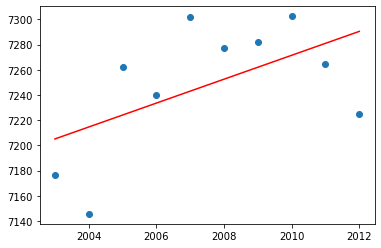

In [90]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [91]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.30238504437623914

In [92]:
all_act_2012_res_unemp_slope = model.coef_
all_act_2012_res_unemp_slope

array([[9.48482697]])

#### 2003-2019 Regression

In [93]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_res_unemp_hpd, all_act_2004_res_unemp_hpd, all_act_2005_res_unemp_hpd,
                                   all_act_2006_res_unemp_hpd, all_act_2007_res_unemp_hpd, all_act_2008_res_unemp_hpd,
                                   all_act_2009_res_unemp_hpd, all_act_2010_res_unemp_hpd, all_act_2011_res_unemp_hpd,
                                   all_act_2012_res_unemp_hpd, all_act_2013_res_unemp_hpd, all_act_2014_res_unemp_hpd,
                                   all_act_2015_res_unemp_hpd, all_act_2016_res_unemp_hpd, all_act_2017_res_unemp_hpd,
                                   all_act_2018_res_unemp_hpd, all_act_2019_res_unemp_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

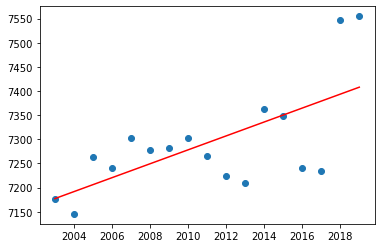

In [94]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [95]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.4268805147380961

In [96]:
all_act_2019_res_unemp_slope = model.coef_
all_act_2019_res_unemp_slope

array([[14.40517963]])

### 2003-2019 NonResidential - Unemployed

In [97]:
#non-residential = 2,4,5,6,7,8,9,10,11,30,31,32

In [98]:
nonresidential_location = [2,4,5,6,7,8,9,10,11,30,31,32]
atus_multi_yr_nonres_unemp = multi_merged_unemployed[multi_merged_unemployed["TEWHERE"].isin(nonresidential_location)]
#atus_multi_yr_res_unemp

In [99]:
atus_2003_nonres_unemp = atus_multi_yr_nonres_unemp[atus_multi_yr_nonres_unemp["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_nonres_unemp = atus_multi_yr_nonres_unemp[atus_multi_yr_nonres_unemp["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_nonres_unemp = atus_multi_yr_nonres_unemp[atus_multi_yr_nonres_unemp["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_nonres_unemp = atus_multi_yr_nonres_unemp[atus_multi_yr_nonres_unemp["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_nonres_unemp = atus_multi_yr_nonres_unemp[atus_multi_yr_nonres_unemp["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_nonres_unemp = atus_multi_yr_nonres_unemp[atus_multi_yr_nonres_unemp["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_nonres_unemp = atus_multi_yr_nonres_unemp[atus_multi_yr_nonres_unemp["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_nonres_unemp = atus_multi_yr_nonres_unemp[atus_multi_yr_nonres_unemp["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_nonres_unemp = atus_multi_yr_nonres_unemp[atus_multi_yr_nonres_unemp["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_nonres_unemp = atus_multi_yr_nonres_unemp[atus_multi_yr_nonres_unemp["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_nonres_unemp = atus_multi_yr_nonres_unemp[atus_multi_yr_nonres_unemp["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_nonres_unemp = atus_multi_yr_nonres_unemp[atus_multi_yr_nonres_unemp["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_nonres_unemp = atus_multi_yr_nonres_unemp[atus_multi_yr_nonres_unemp["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_nonres_unemp = atus_multi_yr_nonres_unemp[atus_multi_yr_nonres_unemp["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_nonres_unemp = atus_multi_yr_nonres_unemp[atus_multi_yr_nonres_unemp["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_nonres_unemp = atus_multi_yr_nonres_unemp[atus_multi_yr_nonres_unemp["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_nonres_unemp = atus_multi_yr_nonres_unemp[atus_multi_yr_nonres_unemp["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_nonres_unemp

### 2003 All Activities - NonResidential - Unemployed

In [100]:
atus_2003_all_nonres_unemp = atus_2003_nonres_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_all_nonres_unemp

In [101]:
atus_2003_all_nonres_unemp_merge = pd.merge(atus_2003_all_nonres_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_all_res_unemp_merge

In [102]:
atus_2003_all_nonres_unemp_merge["Multiplied Weight"]=atus_2003_all_nonres_unemp_merge["TUACTDUR24"]*atus_2003_all_nonres_unemp_merge["TUFNWGTP"]
#atus_2003_all_nonres_unemp_merge

In [103]:
atus_2003_all_nonres_unemp_multiplied_weight = atus_2003_all_nonres_unemp_merge["Multiplied Weight"].sum()
atus_2003_all_nonres_unemp_multiplied_weight

801281691332.0256

In [104]:
all_act_2003_nonres_unemp_hpd = atus_2003_all_nonres_unemp_multiplied_weight / atus_2003_unemp_weight / 60
all_act_2003_nonres_unemp_hpd

3.040072946096031

### 2004 All Activities - NonResidential - Unemployed

In [105]:
atus_2004_all_nonres_unemp = atus_2004_nonres_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_all_nonres_unemp

In [106]:
atus_2004_all_nonres_unemp_merge = pd.merge(atus_2004_all_nonres_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2004_all_res_unemp_merge

In [107]:
atus_2004_all_nonres_unemp_merge["Multiplied Weight"]=atus_2004_all_nonres_unemp_merge["TUACTDUR24"]*atus_2004_all_nonres_unemp_merge["TUFNWGTP"]

atus_2004_all_nonres_unemp_multiplied_weight = atus_2004_all_nonres_unemp_merge["Multiplied Weight"].sum()
atus_2004_all_nonres_unemp_multiplied_weight

765983910291.1521

In [108]:
all_act_2004_nonres_unemp_hpd = atus_2004_all_nonres_unemp_multiplied_weight / atus_2004_unemp_weight / 60
all_act_2004_nonres_unemp_hpd

3.0033150320575746

### 2005 All Activities - NonResidential - Unemployed

In [109]:
atus_2005_all_nonres_unemp = atus_2005_nonres_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_all_nonres_unemp

In [110]:
atus_2005_all_nonres_unemp_merge = pd.merge(atus_2005_all_nonres_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2005_all_res_unemp_merge

In [111]:
atus_2005_all_nonres_unemp_merge["Multiplied Weight"]=atus_2005_all_nonres_unemp_merge["TUACTDUR24"]*atus_2005_all_nonres_unemp_merge["TUFNWGTP"]

atus_2005_all_nonres_unemp_multiplied_weight = atus_2005_all_nonres_unemp_merge["Multiplied Weight"].sum()
atus_2005_all_nonres_unemp_multiplied_weight

687443297716.6096

In [112]:
all_act_2005_nonres_unemp_hpd = atus_2005_all_nonres_unemp_multiplied_weight / atus_2005_unemp_weight / 60
all_act_2005_nonres_unemp_hpd

2.9633536647338685

### 2006 All Activities - NonResidential - Unemployed

In [113]:
atus_2006_all_nonres_unemp = atus_2006_nonres_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_all_nonres_unemp

In [114]:
atus_2006_all_nonres_unemp_merge = pd.merge(atus_2006_all_nonres_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2006_all_res_unemp_merge

In [115]:
atus_2006_all_nonres_unemp_merge["Multiplied Weight"]=atus_2006_all_nonres_unemp_merge["TUACTDUR24"]*atus_2006_all_nonres_unemp_merge["TUFNWGTP"]

atus_2006_all_nonres_unemp_multiplied_weight = atus_2006_all_nonres_unemp_merge["Multiplied Weight"].sum()
atus_2006_all_nonres_unemp_multiplied_weight

716282639980.1855

In [116]:
all_act_2006_nonres_unemp_hpd = atus_2006_all_nonres_unemp_multiplied_weight / atus_2006_unemp_weight / 60
all_act_2006_nonres_unemp_hpd

3.0059256931249725

### 2007 All Activities - NonResidential - Unemployed

In [117]:
atus_2007_all_nonres_unemp = atus_2007_nonres_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_all_nonres_unemp

In [118]:
atus_2007_all_nonres_unemp_merge = pd.merge(atus_2007_all_nonres_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2007_all_res_unemp_merge

In [119]:
atus_2007_all_nonres_unemp_merge["Multiplied Weight"]=atus_2007_all_nonres_unemp_merge["TUACTDUR24"]*atus_2007_all_nonres_unemp_merge["TUFNWGTP"]

atus_2007_all_nonres_unemp_multiplied_weight = atus_2007_all_nonres_unemp_merge["Multiplied Weight"].sum()
atus_2007_all_nonres_unemp_multiplied_weight

645643002768.7258

In [120]:
all_act_2007_nonres_unemp_hpd = atus_2007_all_nonres_unemp_multiplied_weight / atus_2007_unemp_weight / 60
all_act_2007_nonres_unemp_hpd

2.8024433680804304

### 2008 All Activities - NonResidential - Unemployed

In [121]:
atus_2008_all_nonres_unemp = atus_2008_nonres_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_all_nonres_unemp

In [122]:
atus_2008_all_nonres_unemp_merge = pd.merge(atus_2008_all_nonres_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2008_all_res_unemp_merge

In [123]:
atus_2008_all_nonres_unemp_merge["Multiplied Weight"]=atus_2008_all_nonres_unemp_merge["TUACTDUR24"]*atus_2008_all_nonres_unemp_merge["TUFNWGTP"]

atus_2008_all_nonres_unemp_multiplied_weight = atus_2008_all_nonres_unemp_merge["Multiplied Weight"].sum()
atus_2008_all_nonres_unemp_multiplied_weight

824877180969.8381

In [124]:
all_act_2008_nonres_unemp_hpd = atus_2008_all_nonres_unemp_multiplied_weight / atus_2008_unemp_weight / 60
all_act_2008_nonres_unemp_hpd

2.975738562393001

### 2009 All Activities - NonResidential - Unemployed

In [125]:
atus_2009_all_nonres_unemp = atus_2009_nonres_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_all_nonres_unemp

In [126]:
atus_2009_all_nonres_unemp_merge = pd.merge(atus_2009_all_nonres_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2009_all_res_unemp_merge

In [127]:
atus_2009_all_nonres_unemp_merge["Multiplied Weight"]=atus_2009_all_nonres_unemp_merge["TUACTDUR24"]*atus_2009_all_nonres_unemp_merge["TUFNWGTP"]

atus_2009_all_nonres_unemp_multiplied_weight = atus_2009_all_nonres_unemp_merge["Multiplied Weight"].sum()
atus_2009_all_nonres_unemp_multiplied_weight

1186123686160.5032

In [128]:
all_act_2009_nonres_unemp_hpd = atus_2009_all_nonres_unemp_multiplied_weight / atus_2009_unemp_weight / 60
all_act_2009_nonres_unemp_hpd

2.897698348779676

### 2010 All Activities - NonResidential - Unemployed

In [129]:
atus_2010_all_nonres_unemp = atus_2010_nonres_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_all_nonres_unemp

In [130]:
atus_2010_all_nonres_unemp_merge = pd.merge(atus_2010_all_nonres_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2010_all_res_unemp_merge

In [131]:
atus_2010_all_nonres_unemp_merge["Multiplied Weight"]=atus_2010_all_nonres_unemp_merge["TUACTDUR24"]*atus_2010_all_nonres_unemp_merge["TUFNWGTP"]

atus_2010_all_nonres_unemp_multiplied_weight = atus_2010_all_nonres_unemp_merge["Multiplied Weight"].sum()
atus_2010_all_nonres_unemp_multiplied_weight

1182813315454.4673

In [132]:
all_act_2010_nonres_unemp_hpd = atus_2010_all_nonres_unemp_multiplied_weight / atus_2010_unemp_weight / 60
all_act_2010_nonres_unemp_hpd

2.8219498559053204

### 2011 All Activities - NonResidential - Unemployed

In [133]:
atus_2011_all_nonres_unemp = atus_2011_nonres_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_all_nonres_unemp

In [134]:
atus_2011_all_nonres_unemp_merge = pd.merge(atus_2011_all_nonres_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2011_all_res_unemp_merge

In [135]:
atus_2011_all_nonres_unemp_merge["Multiplied Weight"]=atus_2011_all_nonres_unemp_merge["TUACTDUR24"]*atus_2011_all_nonres_unemp_merge["TUFNWGTP"]

atus_2011_all_nonres_unemp_multiplied_weight = atus_2011_all_nonres_unemp_merge["Multiplied Weight"].sum()
atus_2011_all_nonres_unemp_multiplied_weight

1155633312527.121

In [136]:
all_act_2011_nonres_unemp_hpd = atus_2011_all_nonres_unemp_multiplied_weight / atus_2011_unemp_weight / 60
all_act_2011_nonres_unemp_hpd

2.9787264591991285

### 2012 All Activities - NonResidential - Unemployed

In [137]:
atus_2012_all_nonres_unemp = atus_2012_nonres_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_all_nonres_unemp

In [138]:
atus_2012_all_nonres_unemp_merge = pd.merge(atus_2012_all_nonres_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2012_all_res_unemp_merge

In [139]:
atus_2012_all_nonres_unemp_merge["Multiplied Weight"]=atus_2012_all_nonres_unemp_merge["TUACTDUR24"]*atus_2012_all_nonres_unemp_merge["TUFNWGTP"]

atus_2012_all_nonres_unemp_multiplied_weight = atus_2012_all_nonres_unemp_merge["Multiplied Weight"].sum()
atus_2012_all_nonres_unemp_multiplied_weight

1028586884714.4003

In [140]:
all_act_2012_nonres_unemp_hpd = atus_2012_all_nonres_unemp_multiplied_weight / atus_2012_unemp_weight / 60
all_act_2012_nonres_unemp_hpd

3.0541365336546415

### 2013 All Activities - NonResidential - Unemployed

In [141]:
atus_2013_all_nonres_unemp = atus_2013_nonres_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_all_nonres_unemp

In [142]:
atus_2013_all_nonres_unemp_merge = pd.merge(atus_2013_all_nonres_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2013_all_res_unemp_merge

In [143]:
atus_2013_all_nonres_unemp_merge["Multiplied Weight"]=atus_2013_all_nonres_unemp_merge["TUACTDUR24"]*atus_2013_all_nonres_unemp_merge["TUFNWGTP"]

atus_2013_all_nonres_unemp_multiplied_weight = atus_2013_all_nonres_unemp_merge["Multiplied Weight"].sum()
atus_2013_all_nonres_unemp_multiplied_weight

989381309428.4365

In [144]:
all_act_2013_nonres_unemp_hpd = atus_2013_all_nonres_unemp_multiplied_weight / atus_2013_unemp_weight / 60
all_act_2013_nonres_unemp_hpd

3.127352567560488

### 2014 All Activities - NonResidential - Unemployed

In [145]:
atus_2014_all_nonres_unemp = atus_2014_nonres_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_all_nonres_unemp

In [146]:
atus_2014_all_nonres_unemp_merge = pd.merge(atus_2014_all_nonres_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2014_all_res_unemp_merge

In [147]:
atus_2014_all_nonres_unemp_merge["Multiplied Weight"]=atus_2014_all_nonres_unemp_merge["TUACTDUR24"]*atus_2014_all_nonres_unemp_merge["TUFNWGTP"]

atus_2014_all_nonres_unemp_multiplied_weight = atus_2014_all_nonres_unemp_merge["Multiplied Weight"].sum()
atus_2014_all_nonres_unemp_multiplied_weight

803749134299.7153

In [148]:
all_act_2014_nonres_unemp_hpd = atus_2014_all_nonres_unemp_multiplied_weight / atus_2014_unemp_weight / 60
all_act_2014_nonres_unemp_hpd

2.702178394262446

### 2015 All Activities - NonResidential - Unemployed

In [149]:
atus_2015_all_nonres_unemp = atus_2015_nonres_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_all_nonres_unemp

In [150]:
atus_2015_all_nonres_unemp_merge = pd.merge(atus_2015_all_nonres_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2015_all_res_unemp_merge

In [151]:
atus_2015_all_nonres_unemp_merge["Multiplied Weight"]=atus_2015_all_nonres_unemp_merge["TUACTDUR24"]*atus_2015_all_nonres_unemp_merge["TUFNWGTP"]

atus_2015_all_nonres_unemp_multiplied_weight = atus_2015_all_nonres_unemp_merge["Multiplied Weight"].sum()
atus_2015_all_nonres_unemp_multiplied_weight

781899560089.572

In [152]:
all_act_2015_nonres_unemp_hpd = atus_2015_all_nonres_unemp_multiplied_weight / atus_2015_unemp_weight / 60
all_act_2015_nonres_unemp_hpd

2.7785867827935915

### 2016 All Activities - NonResidential - Unemployed

In [153]:
atus_2016_all_nonres_unemp = atus_2016_nonres_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_all_nonres_unemp

In [154]:
atus_2016_all_nonres_unemp_merge = pd.merge(atus_2016_all_nonres_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2016_all_res_unemp_merge

In [155]:
atus_2016_all_nonres_unemp_merge["Multiplied Weight"]=atus_2016_all_nonres_unemp_merge["TUACTDUR24"]*atus_2016_all_nonres_unemp_merge["TUFNWGTP"]

atus_2016_all_nonres_unemp_multiplied_weight = atus_2016_all_nonres_unemp_merge["Multiplied Weight"].sum()
atus_2016_all_nonres_unemp_multiplied_weight

689079101483.5421

In [156]:
all_act_2016_nonres_unemp_hpd = atus_2016_all_nonres_unemp_multiplied_weight / atus_2016_unemp_weight / 60
all_act_2016_nonres_unemp_hpd

2.9939135230635423

### 2017 All Activities - NonResidential - Unemployed

In [157]:
atus_2017_all_nonres_unemp = atus_2017_nonres_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_all_nonres_unemp

In [158]:
atus_2017_all_nonres_unemp_merge = pd.merge(atus_2017_all_nonres_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2017_all_res_unemp_merge

In [159]:
atus_2017_all_nonres_unemp_merge["Multiplied Weight"]=atus_2017_all_nonres_unemp_merge["TUACTDUR24"]*atus_2017_all_nonres_unemp_merge["TUFNWGTP"]

atus_2017_all_nonres_unemp_multiplied_weight = atus_2017_all_nonres_unemp_merge["Multiplied Weight"].sum()
atus_2017_all_nonres_unemp_multiplied_weight

659427848692.301

In [160]:
all_act_2017_nonres_unemp_hpd = atus_2017_all_nonres_unemp_multiplied_weight / atus_2017_unemp_weight / 60
all_act_2017_nonres_unemp_hpd

2.890880931539013

### 2018 All Activities - NonResidential - Unemployed

In [161]:
atus_2018_all_nonres_unemp = atus_2018_nonres_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_all_nonres_unemp

In [162]:
atus_2018_all_nonres_unemp_merge = pd.merge(atus_2018_all_nonres_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2018_all_res_unemp_merge

In [163]:
atus_2018_all_nonres_unemp_merge["Multiplied Weight"]=atus_2018_all_nonres_unemp_merge["TUACTDUR24"]*atus_2018_all_nonres_unemp_merge["TUFNWGTP"]

atus_2018_all_nonres_unemp_multiplied_weight = atus_2018_all_nonres_unemp_merge["Multiplied Weight"].sum()
atus_2018_all_nonres_unemp_multiplied_weight

493470763746.2007

In [164]:
all_act_2018_nonres_unemp_hpd = atus_2018_all_nonres_unemp_multiplied_weight / atus_2018_unemp_weight / 60
all_act_2018_nonres_unemp_hpd

2.3773727135422207

### 2019 All Activities - NonResidential - Unemployed

In [165]:
atus_2019_all_nonres_unemp = atus_2019_nonres_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_all_nonres_unemp

In [166]:
atus_2019_all_nonres_unemp_merge = pd.merge(atus_2019_all_nonres_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2019_all_res_unemp_merge

In [167]:
atus_2019_all_nonres_unemp_merge["Multiplied Weight"]=atus_2019_all_nonres_unemp_merge["TUACTDUR24"]*atus_2019_all_nonres_unemp_merge["TUFNWGTP"]

atus_2019_all_nonres_unemp_multiplied_weight = atus_2019_all_nonres_unemp_merge["Multiplied Weight"].sum()
atus_2019_all_nonres_unemp_multiplied_weight

425945711307.84326

In [168]:
all_act_2019_nonres_unemp_hpd = atus_2019_all_nonres_unemp_multiplied_weight / atus_2019_unemp_weight / 60
all_act_2019_nonres_unemp_hpd

2.1015388136101683

### Regresssion: All Activities - NonResidential - Unemployed

#### 2003 -2012 Regression

In [169]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_nonres_unemp_hpd, all_act_2004_nonres_unemp_hpd, all_act_2005_nonres_unemp_hpd,
                                   all_act_2006_nonres_unemp_hpd, all_act_2007_nonres_unemp_hpd, all_act_2008_nonres_unemp_hpd,
                                   all_act_2009_nonres_unemp_hpd, all_act_2010_nonres_unemp_hpd, all_act_2011_nonres_unemp_hpd,
                                   all_act_2012_nonres_unemp_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

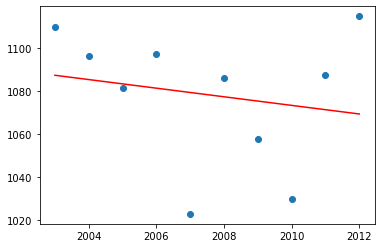

In [170]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [171]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.03678683467752297

In [172]:
all_act_2012_nonres_unemp_slope = model.coef_
all_act_2012_nonres_unemp_slope

array([[-1.99965494]])

#### 2003 -2019 Regression

In [173]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_nonres_unemp_hpd, all_act_2004_nonres_unemp_hpd, all_act_2005_nonres_unemp_hpd,
                                   all_act_2006_nonres_unemp_hpd, all_act_2007_nonres_unemp_hpd, all_act_2008_nonres_unemp_hpd,
                                   all_act_2009_nonres_unemp_hpd, all_act_2010_nonres_unemp_hpd, all_act_2011_nonres_unemp_hpd,
                                   all_act_2012_nonres_unemp_hpd, all_act_2013_nonres_unemp_hpd, all_act_2014_nonres_unemp_hpd,
                                   all_act_2015_nonres_unemp_hpd, all_act_2016_nonres_unemp_hpd, all_act_2017_nonres_unemp_hpd,
                                   all_act_2018_nonres_unemp_hpd, all_act_2019_nonres_unemp_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

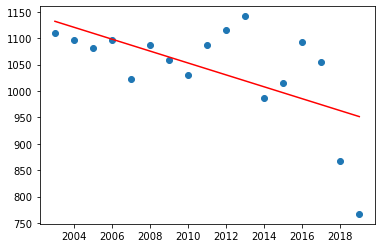

In [174]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [175]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.3589198332255833

In [176]:
all_act_2019_nonres_unemp_slope = model.coef_
all_act_2019_nonres_unemp_slope

array([[-11.2804487]])

## 2003-2019 Transportation - Unemployed

### 2003 Transportation

In [177]:
#transporation = 12, 13. 12 = Car, truck, or motorcycle (driver), 13= Car, truck, or motorcycle (passager)

In [178]:
transpoartion_location = [12,13]
atus_multi_yr_tran_unemp = multi_merged_unemployed[multi_merged_unemployed["TEWHERE"].isin(transpoartion_location)]
#atus_multi_yr_tran_unemp

In [179]:
#atus transportation unemployed population seperated by year
atus_2003_tran_unemp = atus_multi_yr_tran_unemp[atus_multi_yr_tran_unemp["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_tran_unemp = atus_multi_yr_tran_unemp[atus_multi_yr_tran_unemp["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_tran_unemp = atus_multi_yr_tran_unemp[atus_multi_yr_tran_unemp["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_tran_unemp = atus_multi_yr_tran_unemp[atus_multi_yr_tran_unemp["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_tran_unemp = atus_multi_yr_tran_unemp[atus_multi_yr_tran_unemp["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_tran_unemp = atus_multi_yr_tran_unemp[atus_multi_yr_tran_unemp["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_tran_unemp = atus_multi_yr_tran_unemp[atus_multi_yr_tran_unemp["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_tran_unemp = atus_multi_yr_tran_unemp[atus_multi_yr_tran_unemp["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_tran_unemp = atus_multi_yr_tran_unemp[atus_multi_yr_tran_unemp["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_tran_unemp = atus_multi_yr_tran_unemp[atus_multi_yr_tran_unemp["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_tran_unemp = atus_multi_yr_tran_unemp[atus_multi_yr_tran_unemp["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_tran_unemp = atus_multi_yr_tran_unemp[atus_multi_yr_tran_unemp["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_tran_unemp = atus_multi_yr_tran_unemp[atus_multi_yr_tran_unemp["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_tran_unemp = atus_multi_yr_tran_unemp[atus_multi_yr_tran_unemp["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_tran_unemp = atus_multi_yr_tran_unemp[atus_multi_yr_tran_unemp["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_tran_unemp = atus_multi_yr_tran_unemp[atus_multi_yr_tran_unemp["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_tran_unemp = atus_multi_yr_tran_unemp[atus_multi_yr_tran_unemp["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_tran_unemp

In [180]:
atus_2003_tran_unemp = atus_2003_tran_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_tran_unemp

In [181]:
atus_2003_tran_unemp_merge = pd.merge(atus_2003_tran_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_tran_unemp_merge

In [182]:
atus_2003_tran_unemp_merge["Multiplied Weight"] = atus_2003_tran_unemp_merge["TUACTDUR24"] * atus_2003_tran_unemp_merge["TUFNWGTP"]
#atus_2003_tran_unemp_merge

In [183]:
atus_2003_tran_unemp_multiplied_weight = atus_2003_tran_unemp_merge["Multiplied Weight"].sum()
atus_2003_tran_unemp_multiplied_weight

269015237242.3978

In [184]:
atus_2003_tran_unemp_hpd = atus_2003_tran_unemp_multiplied_weight / atus_2003_unemp_weight / 60
atus_2003_tran_unemp_hpd

1.0206472376383526

### 2004 Transportation

In [185]:
atus_2004_tran_unemp = atus_2004_tran_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2004_tran_unemp_merge = pd.merge(atus_2004_tran_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2004_tran_unemp_merge

In [186]:
atus_2004_tran_unemp_merge["Multiplied Weight"] = atus_2004_tran_unemp_merge["TUACTDUR24"] * atus_2004_tran_unemp_merge["TUFNWGTP"]
atus_2004_tran_unemp_multiplied_weight = atus_2004_tran_unemp_merge["Multiplied Weight"].sum()
atus_2004_tran_unemp_multiplied_weight

288649030045.65356

In [187]:
atus_2004_tran_unemp_hpd = atus_2004_tran_unemp_multiplied_weight / atus_2004_unemp_weight / 60
atus_2004_tran_unemp_hpd

1.131752193848873

### 2005 Transportation

In [188]:
atus_2005_tran_unemp = atus_2005_tran_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2005_tran_unemp_merge = pd.merge(atus_2005_tran_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2005_tran_unemp_merge

In [189]:
atus_2005_tran_unemp_merge["Multiplied Weight"] = atus_2005_tran_unemp_merge["TUACTDUR24"] * atus_2005_tran_unemp_merge["TUFNWGTP"]
atus_2005_tran_unemp_multiplied_weight = atus_2005_tran_unemp_merge["Multiplied Weight"].sum()
atus_2005_tran_unemp_multiplied_weight

207900777323.19736

In [190]:
atus_2005_tran_unemp_hpd = atus_2005_tran_unemp_multiplied_weight / atus_2005_unemp_weight / 60
atus_2005_tran_unemp_hpd

0.896195413393484

### 2006 Transportation

In [191]:
atus_2006_tran_unemp = atus_2006_tran_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2006_tran_unemp_merge = pd.merge(atus_2006_tran_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2006_tran_unemp_merge

In [192]:
atus_2006_tran_unemp_merge["Multiplied Weight"] = atus_2006_tran_unemp_merge["TUACTDUR24"] * atus_2006_tran_unemp_merge["TUFNWGTP"]
atus_2006_tran_unemp_multiplied_weight = atus_2006_tran_unemp_merge["Multiplied Weight"].sum()
atus_2006_tran_unemp_multiplied_weight

227350923716.5099

In [193]:
atus_2006_tran_unemp_hpd = atus_2006_tran_unemp_multiplied_weight / atus_2006_unemp_weight / 60
atus_2006_tran_unemp_hpd

0.9540926232332777

### 2007 Transportation

In [194]:
atus_2007_tran_unemp = atus_2007_tran_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2007_tran_unemp_merge = pd.merge(atus_2007_tran_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2007_tran_unemp_merge

In [195]:
atus_2007_tran_unemp_merge["Multiplied Weight"] = atus_2007_tran_unemp_merge["TUACTDUR24"] * atus_2007_tran_unemp_merge["TUFNWGTP"]
atus_2007_tran_unemp_multiplied_weight = atus_2007_tran_unemp_merge["Multiplied Weight"].sum()
atus_2007_tran_unemp_multiplied_weight

212631075893.6386

In [196]:
atus_2007_tran_unemp_hpd = atus_2007_tran_unemp_multiplied_weight / atus_2007_unemp_weight / 60
atus_2007_tran_unemp_hpd

0.9229350367472119

### 2008 Transportation

In [197]:
atus_2008_tran_unemp = atus_2008_tran_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2008_tran_unemp_merge = pd.merge(atus_2008_tran_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2008_tran_unemp_merge

In [198]:
atus_2008_tran_unemp_merge["Multiplied Weight"] = atus_2008_tran_unemp_merge["TUACTDUR24"] * atus_2008_tran_unemp_merge["TUFNWGTP"]
atus_2008_tran_unemp_multiplied_weight = atus_2008_tran_unemp_merge["Multiplied Weight"].sum()
atus_2008_tran_unemp_multiplied_weight

244221536735.30786

In [199]:
atus_2008_tran_unemp_hpd = atus_2008_tran_unemp_multiplied_weight / atus_2008_unemp_weight / 60
atus_2008_tran_unemp_hpd

0.8810274564459166

### 2009 Transportation

In [200]:
atus_2009_tran_unemp = atus_2009_tran_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2009_tran_unemp_merge = pd.merge(atus_2009_tran_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2009_tran_unemp_merge

In [201]:
atus_2009_tran_unemp_merge["Multiplied Weight"] = atus_2009_tran_unemp_merge["TUACTDUR24"] * atus_2009_tran_unemp_merge["TUFNWGTP"]
atus_2009_tran_unemp_multiplied_weight = atus_2009_tran_unemp_merge["Multiplied Weight"].sum()
atus_2009_tran_unemp_multiplied_weight

359509614265.7339

In [202]:
atus_2009_tran_unemp_hpd = atus_2009_tran_unemp_multiplied_weight / atus_2009_unemp_weight / 60
atus_2009_tran_unemp_hpd

0.878281437073729

### 2010 Transportation

In [203]:
atus_2010_tran_unemp = atus_2010_tran_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2010_tran_unemp_merge = pd.merge(atus_2010_tran_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2010_tran_unemp_merge

In [204]:
atus_2010_tran_unemp_merge["Multiplied Weight"] = atus_2010_tran_unemp_merge["TUACTDUR24"] * atus_2010_tran_unemp_merge["TUFNWGTP"]
atus_2010_tran_unemp_multiplied_weight = atus_2010_tran_unemp_merge["Multiplied Weight"].sum()
atus_2010_tran_unemp_multiplied_weight

398738907644.1785

In [205]:
atus_2010_tran_unemp_hpd = atus_2010_tran_unemp_multiplied_weight / atus_2010_unemp_weight / 60
atus_2010_tran_unemp_hpd

0.9513092119173476

### 2011 Transportation

In [206]:
atus_2011_tran_unemp = atus_2011_tran_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2011_tran_unemp_merge = pd.merge(atus_2011_tran_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2011_tran_unemp_merge

In [207]:
atus_2011_tran_unemp_merge["Multiplied Weight"] = atus_2011_tran_unemp_merge["TUACTDUR24"] * atus_2011_tran_unemp_merge["TUFNWGTP"]
atus_2011_tran_unemp_multiplied_weight = atus_2011_tran_unemp_merge["Multiplied Weight"].sum()
atus_2011_tran_unemp_multiplied_weight

363365977467.8368

In [208]:
atus_2011_tran_unemp_hpd = atus_2011_tran_unemp_multiplied_weight / atus_2011_unemp_weight / 60
atus_2011_tran_unemp_hpd

0.9366014632178563

### 2012 Transportation

In [209]:
atus_2012_tran_unemp = atus_2012_tran_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2012_tran_unemp_merge = pd.merge(atus_2012_tran_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2012_tran_unemp_merge

In [210]:
atus_2012_tran_unemp_merge["Multiplied Weight"] = atus_2012_tran_unemp_merge["TUACTDUR24"] * atus_2012_tran_unemp_merge["TUFNWGTP"]
atus_2012_tran_unemp_multiplied_weight = atus_2012_tran_unemp_merge["Multiplied Weight"].sum()
atus_2012_tran_unemp_multiplied_weight

337918528377.4186

In [211]:
atus_2012_tran_unemp_hpd = atus_2012_tran_unemp_multiplied_weight / atus_2012_unemp_weight / 60
atus_2012_tran_unemp_hpd

1.00336620877958

### 2013 Transportation

In [212]:
atus_2013_tran_unemp = atus_2013_tran_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2013_tran_unemp_merge = pd.merge(atus_2013_tran_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2013_tran_unemp_merge

In [213]:
atus_2013_tran_unemp_merge["Multiplied Weight"] = atus_2013_tran_unemp_merge["TUACTDUR24"] * atus_2013_tran_unemp_merge["TUFNWGTP"]
atus_2013_tran_unemp_multiplied_weight = atus_2013_tran_unemp_merge["Multiplied Weight"].sum()
atus_2013_tran_unemp_multiplied_weight

307049817892.92755

In [214]:
atus_2013_tran_unemp_hpd = atus_2013_tran_unemp_multiplied_weight / atus_2013_unemp_weight / 60
atus_2013_tran_unemp_hpd

0.9705591031542364

### 2014 Transportation

In [306]:
atus_2014_tran_unemp = atus_2014_tran_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2014_tran_unemp_merge = pd.merge(atus_2014_tran_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2014_tran_unemp_merge

In [216]:
atus_2014_tran_unemp_merge["Multiplied Weight"] = atus_2014_tran_unemp_merge["TUACTDUR24"] * atus_2014_tran_unemp_merge["TUFNWGTP"]
atus_2014_tran_unemp_multiplied_weight = atus_2014_tran_unemp_merge["Multiplied Weight"].sum()
atus_2014_tran_unemp_multiplied_weight

277702903575.3698

In [217]:
atus_2014_tran_unemp_hpd = atus_2014_tran_unemp_multiplied_weight / atus_2014_unemp_weight / 60
atus_2014_tran_unemp_hpd

0.9336281111134473

### 2015 Transportation

In [218]:
atus_2015_tran_unemp = atus_2015_tran_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2015_tran_unemp_merge = pd.merge(atus_2015_tran_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2015_tran_unemp_merge

In [219]:
atus_2015_tran_unemp_merge["Multiplied Weight"] = atus_2015_tran_unemp_merge["TUACTDUR24"] * atus_2015_tran_unemp_merge["TUFNWGTP"]
atus_2015_tran_unemp_multiplied_weight = atus_2015_tran_unemp_merge["Multiplied Weight"].sum()
atus_2015_tran_unemp_multiplied_weight

239335381109.37955

In [220]:
atus_2015_tran_unemp_hpd = atus_2015_tran_unemp_multiplied_weight / atus_2015_unemp_weight / 60
atus_2015_tran_unemp_hpd

0.8505109358665032

### 2016 Transportation

In [221]:
atus_2016_tran_unemp = atus_2016_tran_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2016_tran_unemp_merge = pd.merge(atus_2016_tran_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2016_tran_unemp_merge

In [222]:
atus_2016_tran_unemp_merge["Multiplied Weight"] = atus_2016_tran_unemp_merge["TUACTDUR24"] * atus_2016_tran_unemp_merge["TUFNWGTP"]
atus_2016_tran_unemp_multiplied_weight = atus_2016_tran_unemp_merge["Multiplied Weight"].sum()
atus_2016_tran_unemp_multiplied_weight

228771691893.12122

In [223]:
atus_2016_tran_unemp_hpd = atus_2016_tran_unemp_multiplied_weight / atus_2016_unemp_weight / 60
atus_2016_tran_unemp_hpd

0.9939681243827425

### 2017 Transportation

In [224]:
atus_2017_tran_unemp = atus_2017_tran_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2017_tran_unemp_merge = pd.merge(atus_2017_tran_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2017_tran_unemp_merge

In [225]:
atus_2017_tran_unemp_merge["Multiplied Weight"] = atus_2017_tran_unemp_merge["TUACTDUR24"] * atus_2017_tran_unemp_merge["TUFNWGTP"]
atus_2017_tran_unemp_multiplied_weight = atus_2017_tran_unemp_merge["Multiplied Weight"].sum()
atus_2017_tran_unemp_multiplied_weight

245339190693.67993

In [226]:
atus_2017_tran_unemp_hpd = atus_2017_tran_unemp_multiplied_weight / atus_2017_unemp_weight / 60
atus_2017_tran_unemp_hpd

1.0755481278839925

### 2018 Transportation

In [227]:
atus_2018_tran_unemp = atus_2018_tran_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2018_tran_unemp_merge = pd.merge(atus_2018_tran_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2018_tran_unemp_merge

In [228]:
atus_2018_tran_unemp_merge["Multiplied Weight"] = atus_2018_tran_unemp_merge["TUACTDUR24"] * atus_2018_tran_unemp_merge["TUFNWGTP"]
atus_2018_tran_unemp_multiplied_weight = atus_2018_tran_unemp_merge["Multiplied Weight"].sum()
atus_2018_tran_unemp_multiplied_weight

162609777947.18665

In [229]:
atus_2018_tran_unemp_hpd = atus_2018_tran_unemp_multiplied_weight / atus_2018_unemp_weight / 60
atus_2018_tran_unemp_hpd

0.7833980803888657

### 2019 Transportation

In [230]:
atus_2019_tran_unemp = atus_2019_tran_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2019_tran_unemp_merge = pd.merge(atus_2019_tran_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2019_tran_unemp_merge

In [231]:
atus_2019_tran_unemp_merge["Multiplied Weight"] = atus_2019_tran_unemp_merge["TUACTDUR24"] * atus_2019_tran_unemp_merge["TUFNWGTP"]
atus_2019_tran_unemp_multiplied_weight = atus_2019_tran_unemp_merge["Multiplied Weight"].sum()
atus_2019_tran_unemp_multiplied_weight

199842575579.40707

In [232]:
atus_2019_tran_unemp_hpd = atus_2019_tran_unemp_multiplied_weight / atus_2019_unemp_weight / 60
atus_2019_tran_unemp_hpd

0.9859869885822563

### Regresssion: Transportation - Unemployed

#### 2003 -2012 Regression

In [233]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_tran_unemp_hpd, atus_2004_tran_unemp_hpd, atus_2005_tran_unemp_hpd,
                                   atus_2006_tran_unemp_hpd, atus_2007_tran_unemp_hpd, atus_2008_tran_unemp_hpd,
                                   atus_2009_tran_unemp_hpd, atus_2010_tran_unemp_hpd, atus_2011_tran_unemp_hpd,
                                   atus_2012_tran_unemp_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

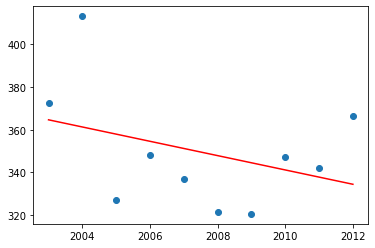

In [234]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [235]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.12881755327419775

In [236]:
tran_2012_unemp_slope = model.coef_
tran_2012_unemp_slope

array([[-3.3521523]])

#### 2003 -2019 Regression

In [237]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_tran_unemp_hpd, atus_2004_tran_unemp_hpd, atus_2005_tran_unemp_hpd,
                                   atus_2006_tran_unemp_hpd, atus_2007_tran_unemp_hpd, atus_2008_tran_unemp_hpd,
                                   atus_2009_tran_unemp_hpd, atus_2010_tran_unemp_hpd, atus_2011_tran_unemp_hpd,
                                   atus_2012_tran_unemp_hpd, atus_2013_tran_unemp_hpd, atus_2014_tran_unemp_hpd,
                                   atus_2015_tran_unemp_hpd, atus_2016_tran_unemp_hpd, atus_2017_tran_unemp_hpd,
                                   atus_2018_tran_unemp_hpd, atus_2019_tran_unemp_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

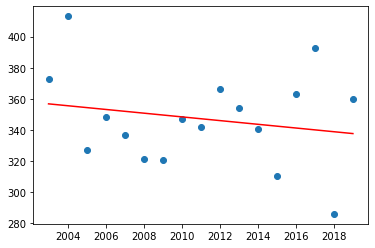

In [238]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [239]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.039064717285199

In [240]:
tran_2019_unemp_slope = model.coef_
tran_2019_unemp_slope

array([[-1.1947927]])

### 2003-2019 - Unspecified- Unemployed

In [241]:
#unspecified = 89, 89 = Unspecified place

In [242]:
unspecified_location = [89]
atus_multi_yr_unsp_unemp = multi_merged_unemployed[multi_merged_unemployed["TEWHERE"].isin(unspecified_location)]
atus_multi_yr_unsp_unemp

,TUCASEID,TUACTDUR24,TUCUMDUR,TRTIER1P,TRTIER2P,TRCODEP,TEWHERE,TELFS,TUFNWGTP,TUSTARTTIM,TUSTOPTIME,TUYEAR
5674,20030111020848,1,661,03,0301,030112,89,4,2.112649e+06,15:00:00,15:01:00,2003
5676,20030111020848,1,672,03,0301,030112,89,4,2.112649e+06,15:11:00,15:12:00,2003
17712,20030112021408,15,351,13,1301,130131,89,4,6.199926e+06,09:36:00,09:51:00,2003
23888,20030112022151,10,615,03,0301,030112,89,4,2.366599e+06,14:05:00,14:15:00,2003
26969,20030112022505,5,485,03,0301,030111,89,4,3.299135e+06,12:00:00,12:05:00,2003
...,...,...,...,...,...,...,...,...,...,...,...,...
3992927,20190403191041,10,690,04,0405,040507,89,4,2.154017e+07,15:20:00,15:30:00,2019
4002613,20190404192391,200,870,13,1301,130131,89,4,1.824885e+07,15:10:00,18:30:00,2019
4011949,20190504191636,15,45,04,0405,040507,89,4,5.137876e+06,04:30:00,04:45:00,2019
4077905,20191008191006,1,694,03,0301,030112,89,4,6.150108e+06,15:33:00,15:34:00,2019


In [310]:
#atus transportation unemployed population seperated by year
#unsp = unspecified
atus_2003_unsp_unemp = atus_multi_yr_unsp_unemp[atus_multi_yr_unsp_unemp["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_unsp_unemp = atus_multi_yr_unsp_unemp[atus_multi_yr_unsp_unemp["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_unsp_unemp = atus_multi_yr_unsp_unemp[atus_multi_yr_unsp_unemp["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_unsp_unemp = atus_multi_yr_unsp_unemp[atus_multi_yr_unsp_unemp["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_unsp_unemp = atus_multi_yr_unsp_unemp[atus_multi_yr_unsp_unemp["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_unsp_unemp = atus_multi_yr_unsp_unemp[atus_multi_yr_unsp_unemp["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_unsp_unemp = atus_multi_yr_unsp_unemp[atus_multi_yr_unsp_unemp["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_unsp_unemp = atus_multi_yr_unsp_unemp[atus_multi_yr_unsp_unemp["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_unsp_unemp = atus_multi_yr_unsp_unemp[atus_multi_yr_unsp_unemp["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_unsp_unemp = atus_multi_yr_unsp_unemp[atus_multi_yr_unsp_unemp["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_unsp_unemp = atus_multi_yr_unsp_unemp[atus_multi_yr_unsp_unemp["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_unsp_unemp = atus_multi_yr_unsp_unemp[atus_multi_yr_unsp_unemp["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_unsp_unemp = atus_multi_yr_unsp_unemp[atus_multi_yr_unsp_unemp["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_unsp_unemp = atus_multi_yr_unsp_unemp[atus_multi_yr_unsp_unemp["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_unsp_unemp = atus_multi_yr_unsp_unemp[atus_multi_yr_unsp_unemp["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_unsp_unemp = atus_multi_yr_unsp_unemp[atus_multi_yr_unsp_unemp["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_unsp_unemp = atus_multi_yr_unsp_unemp[atus_multi_yr_unsp_unemp["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_unsp_unemp
#atus_2004_unsp_unemp["TRCODEP"]

### 2003 Unspecified- Unemployed

In [308]:
atus_2003_unsp_unemp = atus_2003_unsp_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24",])
#atus_2003_unsp_unemp

In [245]:
atus_2003_unsp_unemp_merge = pd.merge(atus_2003_unsp_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_unsp_unemp_merge

In [246]:
atus_2003_unsp_unemp_merge["Multiplied Weight"] = atus_2003_unsp_unemp_merge["TUACTDUR24"] * atus_2003_unsp_unemp_merge["TUFNWGTP"]
#atus_2003_unsp_unemp_merge

In [247]:
atus_2003_unsp_unemp_multiplied_weight = atus_2003_unsp_unemp_merge["Multiplied Weight"].sum()
atus_2003_unsp_unemp_multiplied_weight

7488771392.410891

In [248]:
atus_2003_unsp_unemp_hpd = atus_2003_unsp_unemp_multiplied_weight / atus_2003_unemp_weight / 60
atus_2003_unsp_unemp_hpd

0.028412494077731994

### 2004 Unspecified- Unemployed

In [249]:
atus_2004_unsp_unemp = atus_2004_unsp_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_unsp_unemp

In [250]:
atus_2004_unsp_unemp_merge = pd.merge(atus_2004_unsp_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2004_unsp_unemp_merge["Multiplied Weight"] = atus_2004_unsp_unemp_merge["TUACTDUR24"] * atus_2004_unsp_unemp_merge["TUFNWGTP"]

atus_2004_unsp_unemp_multiplied_weight = atus_2004_unsp_unemp_merge["Multiplied Weight"].sum()
atus_2004_unsp_unemp_multiplied_weight

2612175200.781327

In [251]:
atus_2004_unsp_unemp_hpd = atus_2004_unsp_unemp_multiplied_weight / atus_2004_unemp_weight / 60
atus_2004_unsp_unemp_hpd

0.010241971066849957

### 2005 Unspecified- Unemployed

In [252]:
atus_2005_unsp_unemp = atus_2005_unsp_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_unsp_unemp

In [253]:
atus_2005_unsp_unemp_merge = pd.merge(atus_2005_unsp_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2005_unsp_unemp_merge["Multiplied Weight"] = atus_2005_unsp_unemp_merge["TUACTDUR24"] * atus_2005_unsp_unemp_merge["TUFNWGTP"]

atus_2005_unsp_unemp_multiplied_weight = atus_2005_unsp_unemp_merge["Multiplied Weight"].sum()
atus_2005_unsp_unemp_multiplied_weight

3244295355.526269

In [254]:
atus_2005_unsp_unemp_hpd = atus_2005_unsp_unemp_multiplied_weight / atus_2005_unemp_weight / 60
atus_2005_unsp_unemp_hpd

0.013985145485033289

### 2006 Unspecified- Unemployed

In [255]:
atus_2006_unsp_unemp = atus_2006_unsp_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_unsp_unemp

In [256]:
atus_2006_unsp_unemp_merge = pd.merge(atus_2006_unsp_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2006_unsp_unemp_merge["Multiplied Weight"] = atus_2006_unsp_unemp_merge["TUACTDUR24"] * atus_2006_unsp_unemp_merge["TUFNWGTP"]

atus_2006_unsp_unemp_multiplied_weight = atus_2006_unsp_unemp_merge["Multiplied Weight"].sum()
atus_2006_unsp_unemp_multiplied_weight

3050612273.3861694

In [257]:
atus_2006_unsp_unemp_hpd = atus_2006_unsp_unemp_multiplied_weight / atus_2006_unemp_weight / 60
atus_2006_unsp_unemp_hpd

0.01280208858976051

### 2007 Unspecified- Unemployed

In [258]:
atus_2007_unsp_unemp = atus_2007_unsp_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_unsp_unemp

In [259]:
atus_2007_unsp_unemp_merge = pd.merge(atus_2007_unsp_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2007_unsp_unemp_merge["Multiplied Weight"] = atus_2007_unsp_unemp_merge["TUACTDUR24"] * atus_2007_unsp_unemp_merge["TUFNWGTP"]

atus_2007_unsp_unemp_multiplied_weight = atus_2007_unsp_unemp_merge["Multiplied Weight"].sum()
atus_2007_unsp_unemp_multiplied_weight

6677123004.294082

In [260]:
atus_2007_unsp_unemp_hpd = atus_2007_unsp_unemp_multiplied_weight / atus_2007_unemp_weight / 60
atus_2007_unsp_unemp_hpd

0.028982361771128957

### 2008 Unspecified- Unemployed

In [261]:
atus_2008_unsp_unemp = atus_2008_unsp_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_unsp_unemp

In [262]:
atus_2008_unsp_unemp_merge = pd.merge(atus_2008_unsp_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2008_unsp_unemp_merge["Multiplied Weight"] = atus_2008_unsp_unemp_merge["TUACTDUR24"] * atus_2008_unsp_unemp_merge["TUFNWGTP"]

atus_2008_unsp_unemp_multiplied_weight = atus_2008_unsp_unemp_merge["Multiplied Weight"].sum()
atus_2008_unsp_unemp_multiplied_weight

3101059047.880535

In [263]:
atus_2008_unsp_unemp_hpd = atus_2008_unsp_unemp_multiplied_weight / atus_2008_unemp_weight / 60
atus_2008_unsp_unemp_hpd

0.0111870484551242

### 2009 Unspecified- Unemployed

In [264]:
atus_2009_unsp_unemp = atus_2009_unsp_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_unsp_unemp

In [265]:
atus_2009_unsp_unemp_merge = pd.merge(atus_2009_unsp_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2009_unsp_unemp_merge["Multiplied Weight"] = atus_2009_unsp_unemp_merge["TUACTDUR24"] * atus_2009_unsp_unemp_merge["TUFNWGTP"]

atus_2009_unsp_unemp_multiplied_weight = atus_2009_unsp_unemp_merge["Multiplied Weight"].sum()
atus_2009_unsp_unemp_multiplied_weight

10725994327.972006

In [266]:
atus_2009_unsp_unemp_hpd = atus_2009_unsp_unemp_multiplied_weight / atus_2009_unemp_weight / 60
atus_2009_unsp_unemp_hpd

0.026203587716718855

### 2010 Unspecified- Unemployed

In [267]:
atus_2010_unsp_unemp = atus_2010_unsp_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_unsp_unemp

In [268]:
atus_2010_unsp_unemp_merge = pd.merge(atus_2010_unsp_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2010_unsp_unemp_merge["Multiplied Weight"] = atus_2010_unsp_unemp_merge["TUACTDUR24"] * atus_2010_unsp_unemp_merge["TUFNWGTP"]

atus_2010_unsp_unemp_multiplied_weight = atus_2010_unsp_unemp_merge["Multiplied Weight"].sum()
atus_2010_unsp_unemp_multiplied_weight

9088043779.165169

In [269]:
atus_2010_unsp_unemp_hpd = atus_2010_unsp_unemp_multiplied_weight / atus_2010_unemp_weight / 60
atus_2010_unsp_unemp_hpd

0.021682207579158456

### 2011 Unspecified- Unemployed

In [270]:
atus_2011_unsp_unemp = atus_2011_unsp_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_unsp_unemp

In [271]:
atus_2011_unsp_unemp_merge = pd.merge(atus_2011_unsp_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2011_unsp_unemp_merge["Multiplied Weight"] = atus_2011_unsp_unemp_merge["TUACTDUR24"] * atus_2011_unsp_unemp_merge["TUFNWGTP"]

atus_2011_unsp_unemp_multiplied_weight = atus_2011_unsp_unemp_merge["Multiplied Weight"].sum()
atus_2011_unsp_unemp_multiplied_weight

8363446973.861037

In [272]:
atus_2011_unsp_unemp_hpd = atus_2011_unsp_unemp_multiplied_weight / atus_2011_unemp_weight / 60
atus_2011_unsp_unemp_hpd

0.021557375095626708

### 2012 Unspecified- Unemployed

In [273]:
atus_2012_unsp_unemp = atus_2012_unsp_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_unsp_unemp

In [274]:
atus_2012_unsp_unemp_merge = pd.merge(atus_2012_unsp_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2012_unsp_unemp_merge["Multiplied Weight"] = atus_2012_unsp_unemp_merge["TUACTDUR24"] * atus_2012_unsp_unemp_merge["TUFNWGTP"]

atus_2012_unsp_unemp_multiplied_weight = atus_2012_unsp_unemp_merge["Multiplied Weight"].sum()
atus_2012_unsp_unemp_multiplied_weight

2035833316.5704339

In [275]:
atus_2012_unsp_unemp_hpd = atus_2012_unsp_unemp_multiplied_weight / atus_2012_unemp_weight / 60
atus_2012_unsp_unemp_hpd

0.006044907825453638

### 2013 Unspecified- Unemployed

In [276]:
atus_2013_unsp_unemp = atus_2013_unsp_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_unsp_unemp

In [277]:
atus_2013_unsp_unemp_merge = pd.merge(atus_2013_unsp_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2013_unsp_unemp_merge["Multiplied Weight"] = atus_2013_unsp_unemp_merge["TUACTDUR24"] * atus_2013_unsp_unemp_merge["TUFNWGTP"]

atus_2013_unsp_unemp_multiplied_weight = atus_2013_unsp_unemp_merge["Multiplied Weight"].sum()
atus_2013_unsp_unemp_multiplied_weight

1821602873.8850875

In [278]:
atus_2013_unsp_unemp_hpd = atus_2013_unsp_unemp_multiplied_weight / atus_2013_unemp_weight / 60
atus_2013_unsp_unemp_hpd

0.005757936167210515

### 2014 Unspecified- Unemployed

In [279]:
atus_2014_unsp_unemp = atus_2014_unsp_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_unsp_unemp

In [280]:
atus_2014_unsp_unemp_merge = pd.merge(atus_2014_unsp_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2014_unsp_unemp_merge["Multiplied Weight"] = atus_2014_unsp_unemp_merge["TUACTDUR24"] * atus_2014_unsp_unemp_merge["TUFNWGTP"]

atus_2014_unsp_unemp_multiplied_weight = atus_2014_unsp_unemp_merge["Multiplied Weight"].sum()
atus_2014_unsp_unemp_multiplied_weight

6458677507.009595

In [281]:
atus_2014_unsp_unemp_hpd = atus_2014_unsp_unemp_multiplied_weight / atus_2014_unemp_weight / 60
atus_2014_unsp_unemp_hpd

0.02171386328167688

### 2015 Unspecified- Unemployed

In [282]:
atus_2015_unsp_unemp = atus_2015_unsp_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_unsp_unemp

In [283]:
atus_2015_unsp_unemp_merge = pd.merge(atus_2015_unsp_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2015_unsp_unemp_merge["Multiplied Weight"] = atus_2015_unsp_unemp_merge["TUACTDUR24"] * atus_2015_unsp_unemp_merge["TUFNWGTP"]

atus_2015_unsp_unemp_multiplied_weight = atus_2015_unsp_unemp_merge["Multiplied Weight"].sum()
atus_2015_unsp_unemp_multiplied_weight

4757399817.670819

In [284]:
atus_2015_unsp_unemp_hpd = atus_2015_unsp_unemp_multiplied_weight / atus_2015_unemp_weight / 60
atus_2015_unsp_unemp_hpd

0.016906069434711627

### 2016 Unspecified- Unemployed

In [285]:
atus_2016_unsp_unemp = atus_2016_unsp_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_unsp_unemp

In [286]:
atus_2016_unsp_unemp_merge = pd.merge(atus_2016_unsp_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2016_unsp_unemp_merge["Multiplied Weight"] = atus_2016_unsp_unemp_merge["TUACTDUR24"] * atus_2016_unsp_unemp_merge["TUFNWGTP"]

atus_2016_unsp_unemp_multiplied_weight = atus_2016_unsp_unemp_merge["Multiplied Weight"].sum()
atus_2016_unsp_unemp_multiplied_weight

6839032343.658081

In [287]:
atus_2016_unsp_unemp_hpd = atus_2016_unsp_unemp_multiplied_weight / atus_2016_unemp_weight / 60
atus_2016_unsp_unemp_hpd

0.029714253957585614

### 2017 Unspecified- Unemployed

In [288]:
atus_2017_unsp_unemp = atus_2017_unsp_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_unsp_unemp

In [289]:
atus_2017_unsp_unemp_merge = pd.merge(atus_2017_unsp_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2017_unsp_unemp_merge["Multiplied Weight"] = atus_2017_unsp_unemp_merge["TUACTDUR24"] * atus_2017_unsp_unemp_merge["TUFNWGTP"]

atus_2017_unsp_unemp_multiplied_weight = atus_2017_unsp_unemp_merge["Multiplied Weight"].sum()
atus_2017_unsp_unemp_multiplied_weight

5464974620.597077

In [290]:
atus_2017_unsp_unemp_hpd = atus_2017_unsp_unemp_multiplied_weight / atus_2017_unemp_weight / 60
atus_2017_unsp_unemp_hpd

0.023958028089591046

### 2018 Unspecified- Unemployed

In [291]:
atus_2018_unsp_unemp = atus_2018_unsp_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_unsp_unemp

In [292]:
atus_2018_unsp_unemp_merge = pd.merge(atus_2018_unsp_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2018_unsp_unemp_merge["Multiplied Weight"] = atus_2018_unsp_unemp_merge["TUACTDUR24"] * atus_2018_unsp_unemp_merge["TUFNWGTP"]

atus_2018_unsp_unemp_multiplied_weight = atus_2018_unsp_unemp_merge["Multiplied Weight"].sum()
atus_2018_unsp_unemp_multiplied_weight

4676405903.432171

In [293]:
atus_2018_unsp_unemp_hpd = atus_2018_unsp_unemp_multiplied_weight / atus_2018_unemp_weight / 60
atus_2018_unsp_unemp_hpd

0.02252931806510289

### 2019 Unspecified- Unemployed

In [294]:
atus_2019_unsp_unemp = atus_2019_unsp_unemp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_unsp_unemp

In [295]:
atus_2019_unsp_unemp_merge = pd.merge(atus_2019_unsp_unemp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2019_unsp_unemp_merge["Multiplied Weight"] = atus_2019_unsp_unemp_merge["TUACTDUR24"] * atus_2019_unsp_unemp_merge["TUFNWGTP"]

atus_2019_unsp_unemp_multiplied_weight = atus_2019_unsp_unemp_merge["Multiplied Weight"].sum()
atus_2019_unsp_unemp_multiplied_weight

4273368933.2332363

In [296]:
atus_2019_unsp_unemp_hpd = atus_2019_unsp_unemp_multiplied_weight / atus_2019_unemp_weight / 60
atus_2019_unsp_unemp_hpd

0.02108402653120024

### Regresssion: Unespecified - Unemployed

#### 2003 -2012 Regression

In [297]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_unsp_unemp_hpd, atus_2004_unsp_unemp_hpd, atus_2005_unsp_unemp_hpd,
                                   atus_2006_unsp_unemp_hpd, atus_2007_unsp_unemp_hpd, atus_2008_unsp_unemp_hpd,
                                   atus_2009_unsp_unemp_hpd, atus_2010_unsp_unemp_hpd, atus_2011_unsp_unemp_hpd,
                                   atus_2012_unsp_unemp_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

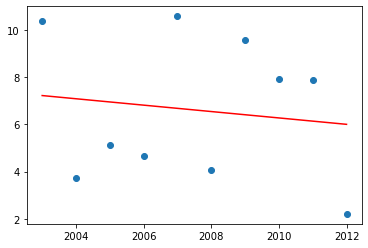

In [298]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [299]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.018455915024962133

In [300]:
all_act_2012_res_unemp_slope = model.coef_
all_act_2012_res_unemp_slope

array([[-0.13539499]])

#### 2003-2019 Regression

In [301]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_unsp_unemp_hpd, atus_2004_unsp_unemp_hpd, atus_2005_unsp_unemp_hpd,
                                   atus_2006_unsp_unemp_hpd, atus_2007_unsp_unemp_hpd, atus_2008_unsp_unemp_hpd,
                                   atus_2009_unsp_unemp_hpd, atus_2010_unsp_unemp_hpd, atus_2011_unsp_unemp_hpd,
                                   atus_2012_unsp_unemp_hpd, atus_2013_unsp_unemp_hpd, atus_2014_unsp_unemp_hpd,
                                   atus_2015_unsp_unemp_hpd, atus_2016_unsp_unemp_hpd, atus_2017_unsp_unemp_hpd,
                                   atus_2018_unsp_unemp_hpd, atus_2019_unsp_unemp_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

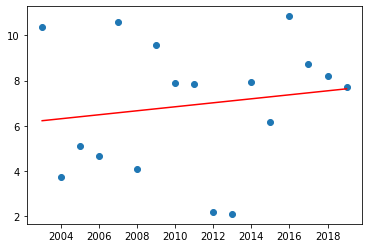

In [302]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [303]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.024623943403670245

In [304]:
all_act_2019_res_unemp_slope = model.coef_
all_act_2019_res_unemp_slope

array([[0.08814435]])